# Environment Setup

## Enabling and testing the GPU

Check the output of !nvidia-smi to make sure you've been allocated a Tesla T4, P4, or P100.

In [ ]:
!nvidia-smi

Thu Dec  8 23:10:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    32W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Check version

In [ ]:
# Check Python Version
!python --version

Python 3.8.16


In [ ]:
# Check Ubuntu Version
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.6 LTS
Release:	18.04
Codename:	bionic


In [ ]:
# Check CUDA/cuDNN Version
!nvcc -V && which nvcc

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
/usr/local/cuda/bin/nvcc


## Installation of Pre-requisites
*   cuDF - GPU GPU DataFrames
*   cuML - GPU Machine Learning Algorithms
*   CatBOOST


### RAPIDSAI cuDF/cuML

In [ ]:
# Install condo for colab
!pip install condacolab
import condacolab
condacolab.install()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:20
🔁 Restarting kernel...


In [ ]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
# Update condo
!conda update -n base -c conda-forge conda

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.12.7  |       ha878542_0         143 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    colorama-0.4.6             |     pyhd8ed1ab_0          25 KB  conda-forge
    conda-22.11.1              |   py38h578d9bd_1         905 KB  conda-forge
    pluggy-1.0.0               |     pyhd8ed1ab_5          16 KB  conda-forge
    ruamel.yaml-0.17.21        |   py38h0a891b7_2         172 KB  conda-forge
    ruamel.yaml.clib-0.2.7     |   py38h1de0b5d_1         143 KB  conda-forge
    tqdm-4.64.1                |     pyhd8ed1ab_0          82 KB  conda-forge
    xz-5.2.9                  

In [ ]:
#  Install cuDF/cuML, based on the version of python and Cuda compiler. 
!conda install -c rapidsai -c conda-forge -c nvidia cudf=22.10 cuml=22.10 python=3.8 cudatoolkit=11.2

Solving environment: | failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 

In [ ]:
# test
#import cudf
#import cuml

### Install CatBoost

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 96.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 113.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 76.2 MB/s eta 0:00:00


# Import key libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
OUT_DIR = ('/Fashion-MNIST/results')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

import cudf
import cuml

RANDOM_SEED = 12248
K_FOLD_CV   = 5

# MNIST dataset

In [ ]:
# Load the Fashion MNIST dataset
import tensorflow as tf
fmnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()
# Normalize the pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

print('Dimensions of the dataset:')
print('train: X=',train_images.shape, ', y=',train_labels.shape)
print('test:  X=',test_images.shape, ',  y=',test_labels.shape)

Dimensions of the dataset:
train: X= (60000, 28, 28) , y= (60000,)
test:  X= (10000, 28, 28) ,  y= (10000,)


In [ ]:
# Given label descriptions
label_des = {0:	'T-shirt/top',  1:	'Trouser',
             2:	'Pullover',     3:	'Dress',
             4:	'Coat',         5:	'Sandal',
             6:	'Shirt',        7:	'Sneaker',
             8:	'Bag',          9:	'Ankle boot'}
ordered_class = label_des.keys()
display(pd.DataFrame.from_dict(label_des, orient='index', columns=['label_descriptions']))

,label_descriptions
0,T-shirt/top
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag
9,Ankle boot


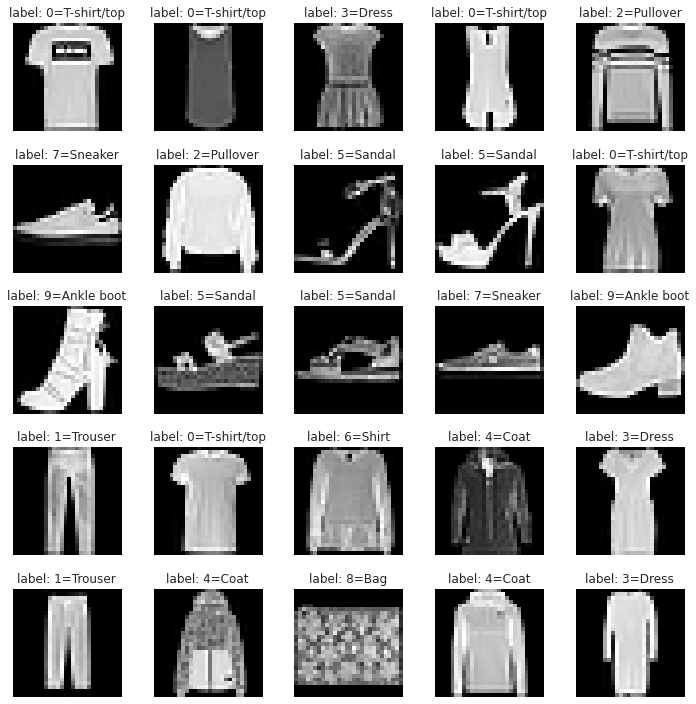

In [ ]:
# Data visualization
plt.figure(figsize=(10,10))
for i in range(1,26):
    plt.subplot(5, 5, i)
    plt.grid(False); plt.axis('off')
    plt.gray()
    plt.imshow(train_images[i])
    plt.title('label: '+str(train_labels[i])+'='+label_des[train_labels[i]])
plt.tight_layout()
plt.show()

In [ ]:
# [X] Reshape the image of dimensions 28x28 to 1D-vector
X_train = train_images.reshape((train_labels.shape[0],-1))
X_test  = test_images.reshape((test_labels.shape[0],-1))

# [y] Convert labels (integer) to float
y_train = train_labels.astype('float64')
y_test  = test_labels.astype('float64')

# Normalized dataset
input_data = pd.DataFrame(np.vstack([X_train,X_test]))
output_data = pd.DataFrame(np.hstack([y_train,y_test]), columns=['labels'])
data = pd.concat([output_data,input_data], axis=1)

# Check missing values
print('Check missing values:')
for col in data.columns:
    if data[col].isna().any():
        print(col, (data[col]==0).sum(), data[data[col]==0].index)
# Check negative values
print('Check negative values:')
for col in data.columns:
    if (data[col]<0).any():
        print(col, (data[col]==0).sum(), data[data[col]==0].index)

Check missing values:
Check negative values:


# Data Exploration

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
train_label_counts = pd.DataFrame(zip(unique, counts), columns=['labels','train-counts'])

unique, counts = np.unique(y_test, return_counts=True)
test_label_counts = pd.DataFrame(zip(unique, counts), columns=['labels','test-counts'])

display(pd.concat([train_label_counts.set_index('labels'),test_label_counts.set_index('labels')], axis=1, join='inner').reset_index(drop=False))

,labels,train-counts,test-counts
0,0.0,6000,1000
1,1.0,6000,1000
2,2.0,6000,1000
3,3.0,6000,1000
4,4.0,6000,1000
5,5.0,6000,1000
6,6.0,6000,1000
7,7.0,6000,1000
8,8.0,6000,1000
9,9.0,6000,1000


## Normality test

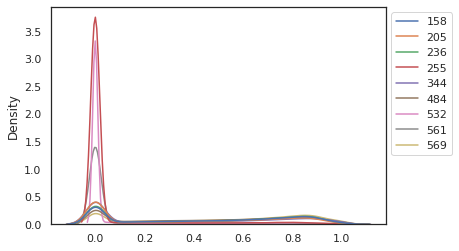

In [ ]:
# Visualize data distribution 

_ = np.random.choice(input_data.columns,10) ## Randomly select 10 features
select_data = input_data[_].copy()
ax = sns.kdeplot(data=select_data)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1), ncol=1)

Null hypothesis: x comes from a normal distribution
The null hypothesis can be rejected.


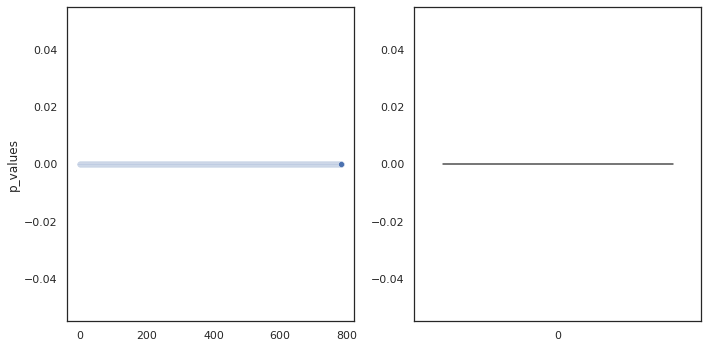

In [ ]:
# Normality test to check whether data is from Gaussian distribution.
alpha = 0.01
print('Null hypothesis: x comes from a normal distribution')
p_values = []
for i in input_data.columns:
    k2,p = scipy.stats.normaltest(input_data[i])
    p_values.append(p)
if pd.Series(p_values).ge(alpha).any():
    print('The null hypothesis cannot be rejected')
else:
    print("The null hypothesis can be rejected.")

# Visualize p_values
_ = pd.Series(p_values).rename('p_values')
fig, axes = plt.subplots(1, 2, sharey=False, figsize=(10,5))
sns.scatterplot(data=_, ax=axes[0])
sns.violinplot(data=_, ax=axes[1])
plt.tight_layout(); plt.show()

Fashion-MNIST is a balanced dataset of 10 classes (labels), consiting of 60,000 images as the training set and 6,000 images as the testing set. Each image is a 28x28 pixel grayscale image, which can be directly flatten to 784 features. The data faile the normality test, confirming the non-gaussian behaviour.

Keywords: Multi-Class Classification, Balanced Classification

## t-SNE & UMAP

In [ ]:
from cuml.manifold import UMAP, TSNE

[W] [07:16:44.770907] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
[W] [07:16:53.147082] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
[W] [07:17:01.770277] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
[W] [07:17:10.243834] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
[W] [07:17:18.929658] Perplexity should be within ranges (5, 50). Your results might be a bit strange...
[W] [07:17:18.929776] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
[W] [07:17:27.673184] Perplexity should be within ranges (5, 50). Your results might be a bit strange...
[W] [07:17:27.673300] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


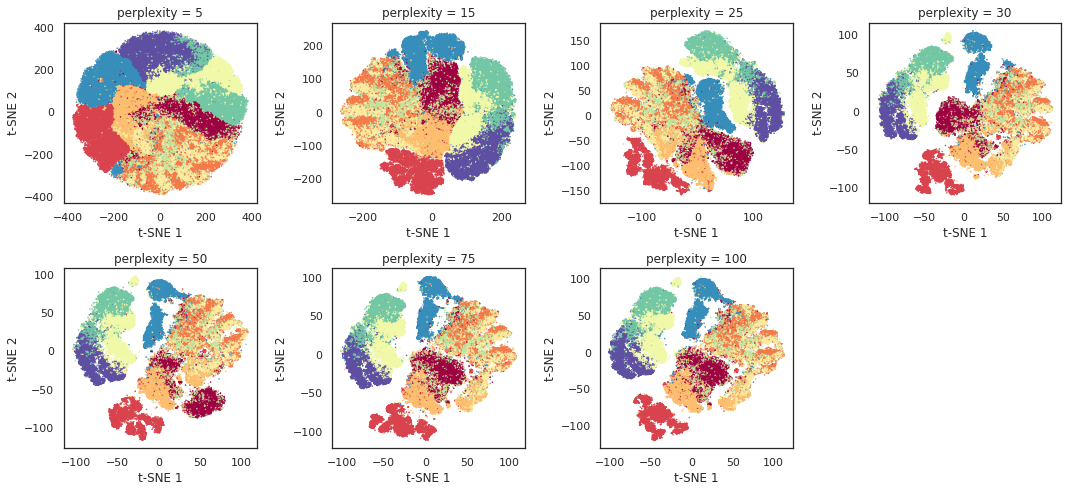

In [ ]:
# T-SNE: Tuning perplexities
perplexities = [5, 15, 25, 30, 50, 75, 100]

plt.figure(figsize = (15, 7))
for i, k in enumerate(perplexities, start = 1):
    plt.subplot(2, 4, i)
    tsne_embed = TSNE(n_components=2, perplexity=k, method='barnes_hut', random_state=RANDOM_SEED).fit_transform(input_data)
    plt.scatter(tsne_embed[:, 0], tsne_embed[:, 1], s=0.3, c = output_data.values, cmap='Spectral')
    plt.xlabel('t-SNE 1'); plt.ylabel('t-SNE 2')
    plt.title('perplexity = ' + str(k))

plt.tight_layout()
plt.show()

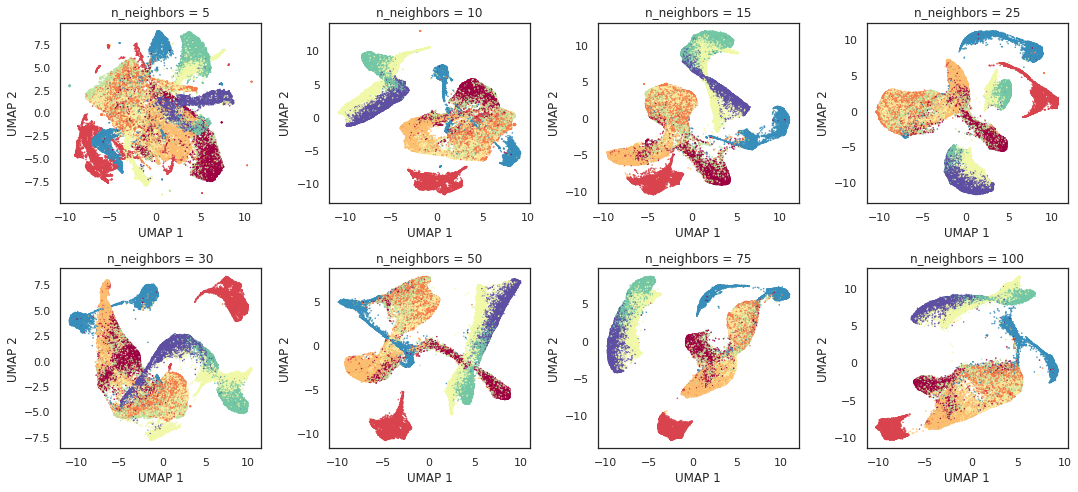

In [ ]:
# UMAP: Tuning n_neighbors
neighbers = [5, 10, 15, 25, 30, 50, 75, 100]

plt.figure(figsize = (15, 7))

for i, n in enumerate(neighbers, start=1):
    plt.subplot(2, 4, i)
    umap_embed = UMAP(n_components=2, n_neighbors=n, min_dist=0.1, random_state=RANDOM_SEED).fit_transform(input_data)
    plt.scatter(umap_embed[:, 0], umap_embed[:, 1], s=0.3, c = output_data.values, cmap='Spectral')
    plt.xlabel('UMAP 1'); plt.ylabel('UMAP 2')
    plt.title('n_neighbors = ' + str(n))

plt.tight_layout()
plt.show()

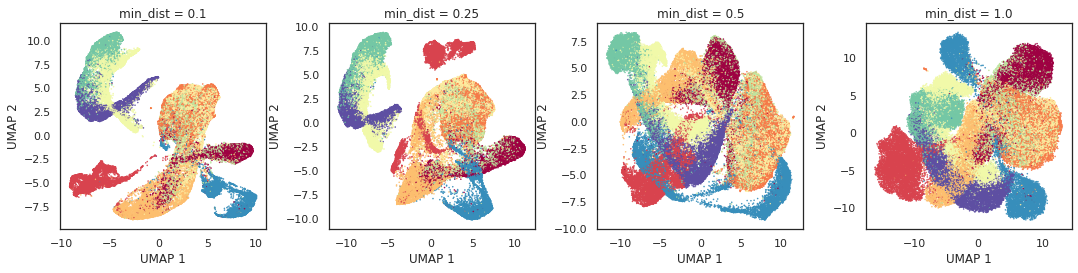

In [ ]:
# UMAP: Tuning min_dist
n = 15
min_dists = [0.1, 0.25, 0.5, 1.0]
plt.figure(figsize = (15, 7))

for i, md in enumerate(min_dists, start = 1):
    plt.subplot(2, 4, i)
    umap_embed = UMAP(n_components=2, n_neighbors=15, min_dist=md, random_state=RANDOM_SEED).fit_transform(input_data)
    plt.scatter(umap_embed[:, 0], umap_embed[:, 1], s=0.3, c = output_data.values, cmap='Spectral')
    plt.xlabel('UMAP 1'); plt.ylabel('UMAP 2')
    plt.title('min_dist = ' + str(md))

plt.tight_layout()
plt.show()

[W] [23:52:32.601733] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


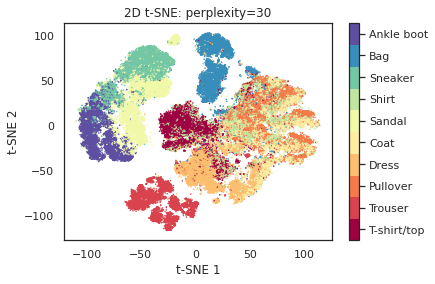

In [ ]:
k = 30
if True:
    tsne_embed = TSNE(n_components=2, perplexity=k, method='barnes_hut', random_state=RANDOM_SEED).fit_transform(input_data)
    plt.scatter(tsne_embed[:, 0], tsne_embed[:, 1], s=0.3, c = output_data.values, cmap='Spectral')
    plt.xlabel('t-SNE 1'); plt.ylabel('t-SNE 2')
    plt.title('2D t-SNE: perplexity=' + str(k))
    plt.setp(ax, xticks = [], yticks = [])
    cbar = plt.colorbar(boundaries = np.arange(11)-0.5)
    cbar.set_ticks(np.arange(10))
    cbar.set_ticklabels(label_des)

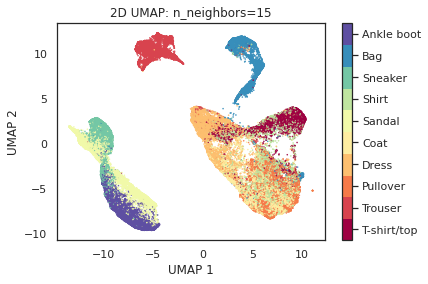

In [ ]:
n = 15
if True:
    umap_embed = UMAP(n_components=2, n_neighbors=n, min_dist=0.1, random_state=RANDOM_SEED, n_epochs=500).fit_transform(input_data)
    plt.scatter(umap_embed[:, 0], umap_embed[:, 1], s=0.3, c = output_data.values, cmap='Spectral')
    plt.xlabel('UMAP 1'); plt.ylabel('UMAP 2')
    plt.title('2D UMAP: n_neighbors=' + str(n))
    plt.setp(ax, xticks = [], yticks = [])
    cbar = plt.colorbar(boundaries = np.arange(11)-0.5)
    cbar.set_ticks(np.arange(10))
    cbar.set_ticklabels(label_des)

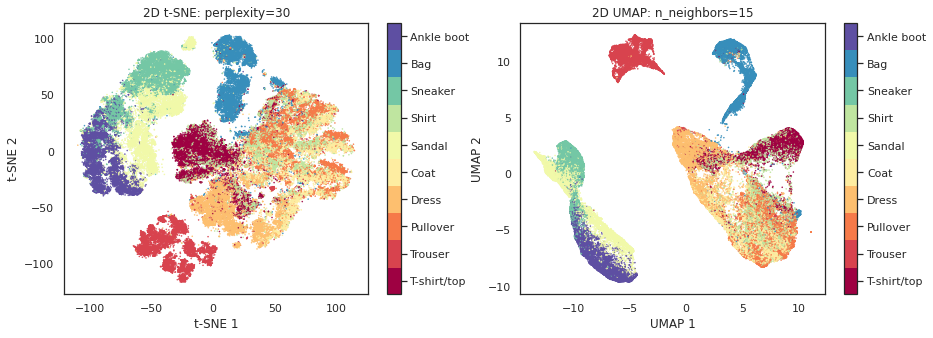

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
k = 30
if True:
    #tsne_embed = TSNE(n_components=2, perplexity=k, method='barnes_hut', random_state=RANDOM_SEED).fit_transform(input_data)
    plt.scatter(tsne_embed[:, 0], tsne_embed[:, 1], s=0.3, c = output_data.values, cmap='Spectral')
    plt.xlabel('t-SNE 1'); plt.ylabel('t-SNE 2')
    plt.title('2D t-SNE: perplexity=' + str(k))
    plt.setp(ax, xticks = [], yticks = [])
    cbar = plt.colorbar(boundaries = np.arange(11)-0.5)
    cbar.set_ticks(np.arange(10))
    cbar.set_ticklabels(label_des)
plt.subplot(1,2,2)
n = 15
if True:
    #umap_embed = UMAP(n_components=2, n_neighbors=n, min_dist=0.1, random_state=RANDOM_SEED, n_epochs=500).fit_transform(input_data)
    plt.scatter(umap_embed[:, 0], umap_embed[:, 1], s=0.3, c = output_data.values, cmap='Spectral')
    plt.xlabel('UMAP 1'); plt.ylabel('UMAP 2')
    plt.title('2D UMAP: n_neighbors=' + str(n))
    plt.setp(ax, xticks = [], yticks = [])
    cbar = plt.colorbar(boundaries = np.arange(11)-0.5)
    cbar.set_ticks(np.arange(10))
    cbar.set_ticklabels(label_des)


# Clustering

## UMAP Clustering with Trustworthiness Scores (manifold learning)

Training with Labels and Embedding Unlabelled Test Data

In [ ]:
def plot_2D_umap(umap_embed, X, y, set_label=''):
    # Evaluate the clustering score of UMAP by using trustworthiness metrics
    from cuml.metrics import trustworthiness
    umap_score = trustworthiness(X, umap_embed)
    # Plot
    plt.scatter(umap_embed[:, 0], umap_embed[:, 1], s=0.3, c = y, cmap='Spectral')
    plt.xlabel('UMAP 1'); plt.ylabel('UMAP 2')
    plt.title(set_label+': score={0:.4f}'.format(umap_score))
    #plt.setp(xticks = [], yticks = [])
    cbar = plt.colorbar(boundaries = np.arange(11)-0.5)
    cbar.set_ticks(np.arange(10))
    cbar.set_ticklabels(label_des)

# Test
#train_umap_embed = UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=RANDOM_SEED, n_epochs=500).fit_transform(X_train, y_train)
#plot_2D_umap(train_umap_embed, X_train, y_train, set_label='TRAIN')

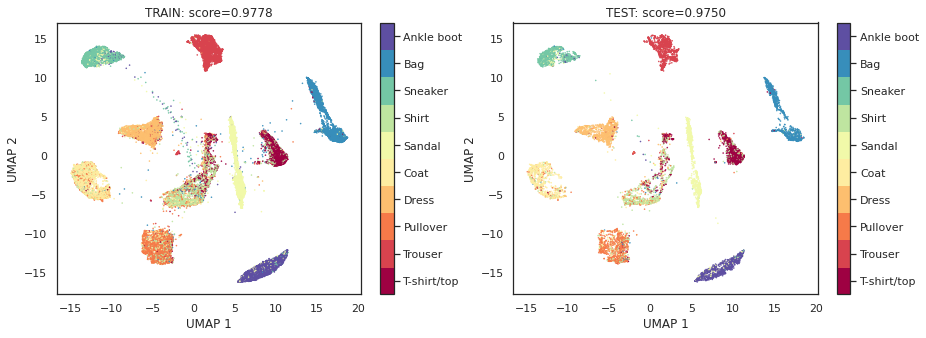

In [ ]:
umap_model =  UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=RANDOM_SEED, n_epochs=500)
umap_model.fit(X_train, y_train)
train_umap_embed = umap_model.transform(X_train)
test_umap_embed = umap_model.transform(X_test)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plot_2D_umap(train_umap_embed, X_train, y_train, set_label='TRAIN')
plt.subplot(1,2,2)
plot_2D_umap(test_umap_embed, X_test, y_test, set_label='TEST')

## DBSCAN Clustering with Adjusted Random Index [Not working]

[W] [02:27:40.481775] Batch size limited by the chosen integer type (4 bytes). 40991 -> 35791. Using the larger integer type might result in better performance
[W] [02:28:49.275937] Batch size limited by the chosen integer type (4 bytes). 40991 -> 35791. Using the larger integer type might result in better performance
[W] [02:29:57.889385] Batch size limited by the chosen integer type (4 bytes). 40991 -> 35791. Using the larger integer type might result in better performance
[W] [02:31:06.305152] Batch size limited by the chosen integer type (4 bytes). 40991 -> 35791. Using the larger integer type might result in better performance


[]

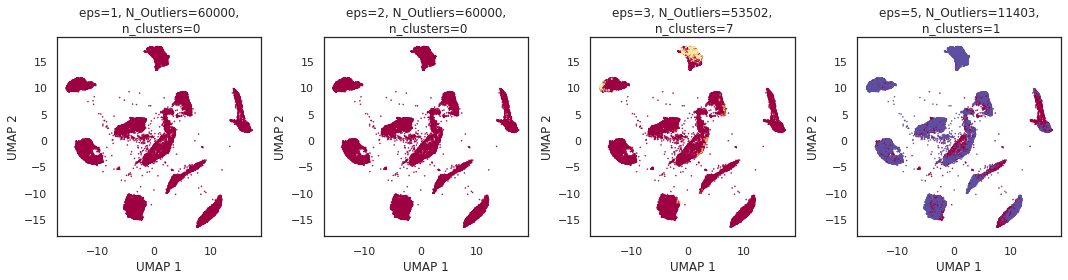

In [ ]:
# DBSCAN
from cuml import DBSCAN
from cuml.metrics.cluster import adjusted_rand_score

eps_list = [1,2,3,5]
plt.figure(figsize = (15, 7))
for i, eps_val in enumerate(eps_list, start=1):
    plt.subplot(2, 4, i)
    clustering = DBSCAN(eps=eps_val, min_samples=50).fit(X_train) #metric='euclidean'
    #clustering = DBSCAN(eps=eps_val).fit(std_data)
    clustering_id = clustering.labels_
    n_clusters = len(set(clustering_id)) - (1 if -1 in clustering_id else 0)

    plt.scatter(train_umap_embed[:, 0], train_umap_embed[:, 1], s=0.3, c=clustering_id, cmap='Spectral')
    plt.xlabel('UMAP 1'); 
    plt.ylabel('UMAP 2')
    plt.title('eps={}, N_Outliers={},\n n_clusters={}'.format(round(eps_val,2),(clustering_id==-1).sum(),n_clusters ) )
plt.tight_layout()
plt.plot()

## AgglomerativeClustering with silhouette scores [Not working]

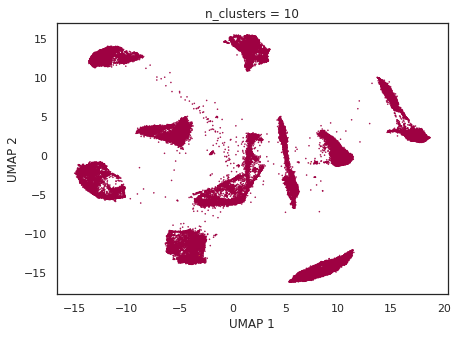

In [ ]:
from cuml import AgglomerativeClustering
from cuml.metrics.cluster import silhouette_score

plt.figure(figsize = (7, 5))
if True:
#for i, N in enumerate(range(1,5), start=1):
    #plt.subplot(2, 4, i)
    clustering = AgglomerativeClustering(n_clusters=10).fit(X_train)
    clustering_id = clustering.labels_

    plt.scatter(train_umap_embed[:, 0], train_umap_embed[:, 1], s=0.3, c = clustering_id, cmap='Spectral')
    plt.xlabel('UMAP 1'); plt.ylabel('UMAP 2')
    plt.title('n_clusters = ' + str(10))

In [ ]:
unique, counts = np.unique(clustering_id, return_counts=True)
train_label_counts = pd.DataFrame(zip(unique, counts), columns=['clustering_id','train-counts'])
display(train_label_counts)

,clustering_id,train-counts
0,0,59991
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1
7,7,1
8,8,1
9,9,1


# Classification

In [ ]:
def eval_confusion_matrix(y_train,y_pred_train,y_test,y_pred_test, MODEL_LABEL=''):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score
    # CONFUSION METRIX with report of accuracy score
    conf_mat_train = pd.DataFrame(confusion_matrix(y_train, y_pred_train),
                                  index = ordered_class, columns = ['Predicted ' + str(x) for x in ordered_class])
    conf_mat_test = pd.DataFrame(confusion_matrix(y_test, y_pred_test),
                                 index = ordered_class, columns = ['Predicted ' + str(x) for x in ordered_class])
    plt.figure(figsize = (15, 7))
    plt.subplot(1,2,1)
    sns.heatmap(conf_mat_train, annot = True, square=True, cbar=False, fmt='d')
    plt.title('{0}: TRAIN: \naccuracy = {1:.4f}'.format(MODEL_LABEL, 
                                                                 accuracy_score(y_train, y_pred_train)))
    plt.subplot(1,2,2)
    sns.heatmap(conf_mat_test, annot = True, square=True, cbar=False, fmt='d')
    plt.title('{0}: TEST: \naccuracy = {1:.4f}'.format(MODEL_LABEL, 
                                                                accuracy_score(y_test, y_pred_test)))
    plt.tight_layout()
    plt.show()


## Logistic Regression

In [ ]:
from cuml import LogisticRegression

model = LogisticRegression()
model_label = 'Logistic'
parameters = {}
METRIC = 'accuracy'
if True:
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

[W] [03:19:40.507271] L-BFGS: max iterations reached
[W] [03:19:40.509324] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.


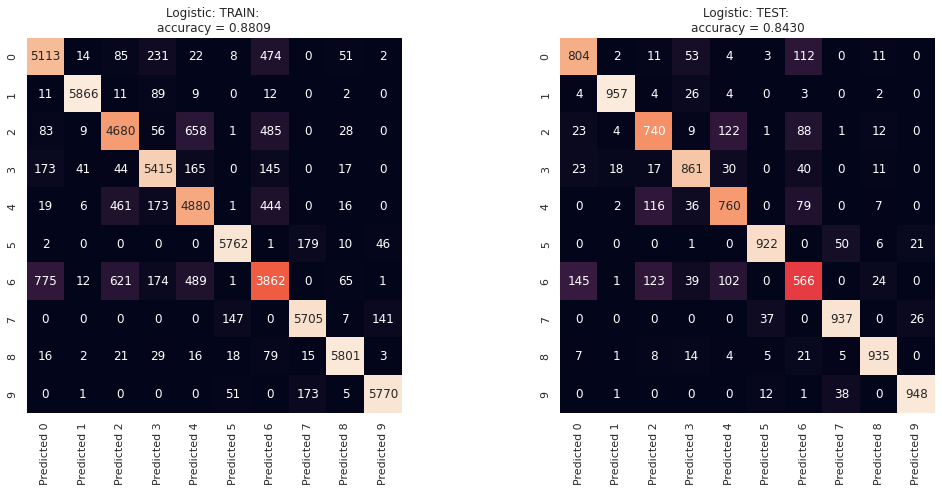

In [ ]:
eval_confusion_matrix(y_train,y_pred_train,y_test,y_pred_test, model_label)

## XGBoost

In [ ]:
import xgboost as XGB
model = XGB.XGBClassifier(seed=RANDOM_SEED, tree_method='gpu_hist')
model_label = 'XGBoost'
parameters = {}
METRIC = 'accuracy'
if True:
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

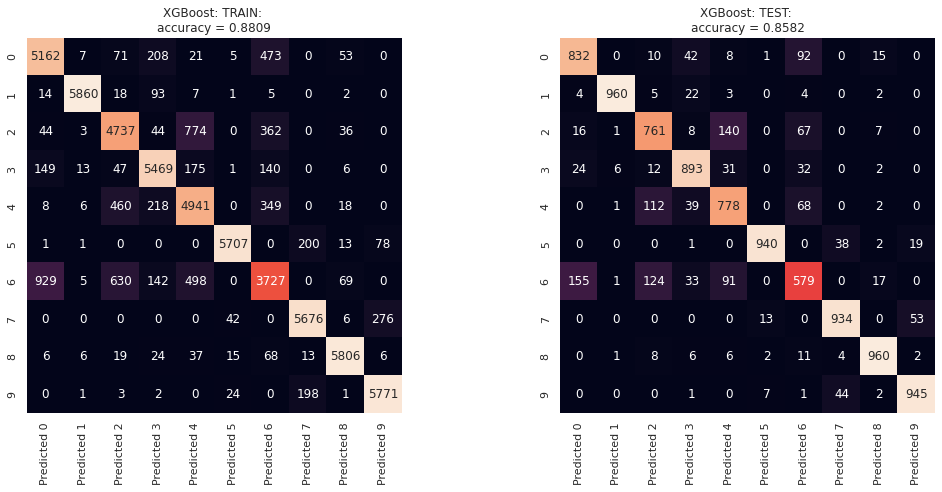

In [ ]:
eval_confusion_matrix(y_train,y_pred_train,y_test,y_pred_test, model_label)

In [ ]:
import xgboost as XGB
model = XGB.XGBClassifier(seed=RANDOM_SEED, tree_method='gpu_hist')
model_label = 'XGBoost'
parameters = {'n_estimators':[50,100,150,200], 
              'learning_rate':[.001,0.01,.1],
              #'min_child_weight': [0.5,1,3,5],
              #'max_depth':[5,10,20],
              #'gamma': [0, 2, 5, 10],
              'subsample':[.5,.75,1]
              }
METRIC = 'accuracy'
tuned_model,tuned_model_result = model_tuning_cv(X_train, y_train,model,parameters,METRIC,cv_splitter)

if True:
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    eval_confusion_matrix(y_train,y_pred_train,y_test,y_pred_test, model_label)

## CatBoost

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(random_state=RANDOM_SEED, 
                           early_stopping_rounds=5, od_type='IncToDec', 
                           task_type='GPU')
model_label = 'CatBoost'
parameters = {}
METRIC = 'accuracy'
if True:
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.149633
0:	learn: 1.7253878	total: 125ms	remaining: 2m 4s
1:	learn: 1.4629598	total: 225ms	remaining: 1m 52s
2:	learn: 1.2905306	total: 285ms	remaining: 1m 34s
3:	learn: 1.1687724	total: 344ms	remaining: 1m 25s
4:	learn: 1.0709187	total: 404ms	remaining: 1m 20s
5:	learn: 0.9915311	total: 463ms	remaining: 1m 16s
6:	learn: 0.9275132	total: 519ms	remaining: 1m 13s
7:	learn: 0.8690751	total: 579ms	remaining: 1m 11s
8:	learn: 0.8174191	total: 641ms	remaining: 1m 10s
9:	learn: 0.7789462	total: 696ms	remaining: 1m 8s
10:	learn: 0.7388617	total: 752ms	remaining: 1m 7s
11:	learn: 0.7081985	total: 809ms	remaining: 1m 6s
12:	learn: 0.6779177	total: 870ms	remaining: 1m 6s
13:	learn: 0.6542365	total: 925ms	remaining: 1m 5s
14:	learn: 0.6327034	total: 990ms	remaining: 1m 5s
15:	learn: 0.6174572	total: 1.04s	remaining: 1m 4s
16:	learn: 0.5995980	total: 1.1s	remaining: 1m 3s
17:	learn: 0.5854544	total: 1.16s	remaining: 1m 3s
18:	learn: 0.5698286	total: 1.22s	remaining: 1m 2s
19:	

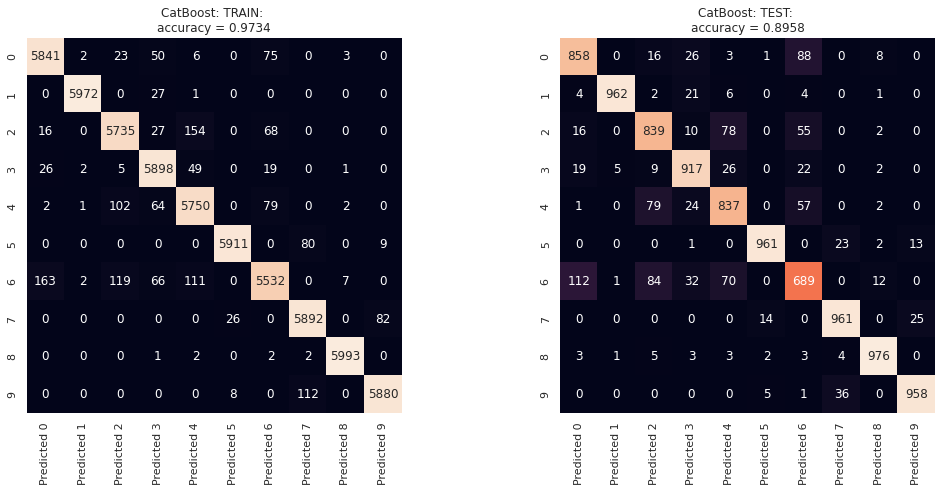

In [ ]:
eval_confusion_matrix(y_train,y_pred_train,y_test,y_pred_test, model_label)

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(random_state=RANDOM_SEED, 
                           early_stopping_rounds=5, od_type='IncToDec', 
                           task_type='GPU')
model_label = 'CatBoost'
parameters = {'n_estimators':[50,100,150,200], 
              'learning_rate':[.001,0.01,.1],
              'max_depth':[5,10,20],
              'subsample':[.5,.75,1]
              }
METRIC = 'accuracy'
tuned_model,tuned_model_result = model_tuning_cv(X_train, y_train,model,parameters,METRIC,cv_splitter)
if True:
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    eval_confusion_matrix(y_train,y_pred_train,y_test,y_pred_test, model_label)